Importer les bibliothèques nécessaires.

objectif un modèle prédictif pour estimer la probabilité de survie des passagers

In [5]:
!pip  install pandas
!pip install plotly
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 

In [ ]:
import pandas as pd
import plotly as pt
import plotly as pt
from collections import Counter #compte automatiquement combien des elements apparaît
import numpy as np

Charger les données et vérification de types et les valeurs manquantes

In [114]:
df = pd.read_csv('../titanic-project/titanic_data/gender_submission.csv')
test = pd.read_csv('../titanic-project/titanic_data/test.csv')
train = pd.read_csv('../titanic-project/titanic_data/train.csv')
print(train.isna().sum())
print(train.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Sex et classe 

Le nombre total et le nombre de survivants et morts pour les hommes et les femmes sur un graphique.

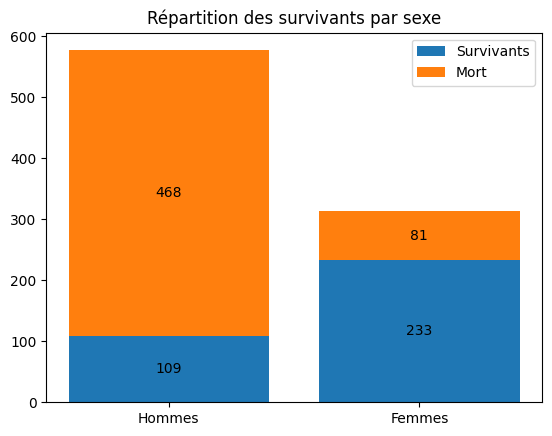

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
train = pd.read_csv('../titanic-project/titanic_data/train.csv')

# Compter le nombre total d'hommes et de femmes et le nombre de survivants
males_total = len(train.loc[(train['Sex'] == 'male')])
females_total = len(train.loc[(train['Sex'] == 'female')])
# print(f"Males total: {males_total}\nFemales total: {females_total}")
males_total_survived = len(train.loc[(train['Sex'] == 'male') & (train['Survived'] == 1)])
females_total_survived = len(train.loc[(train['Sex'] == 'female') & (train['Survived'] == 1)])
# print(f"Males Survivants: {males_total_survived}\nFemales Survivants: {females_total_survived}")

count = {
    "Survivants": [males_total_survived, females_total_survived],
    "Mort": [males_total-males_total_survived, females_total-females_total_survived]
}
# print(count)

fig, ax = plt.subplots()
x = np.zeros(2) # list = [0,0 hommes ; 0,0 femmes]
ax.set_title("Répartition des survivants par sexe")
for key, count in count.items():
    i = ax.bar(('Hommes', 'Femmes'),count, width=0.8, bottom=x, label=key)
    x+=count
    ax.legend()
    ax.bar_label(i, label_type="center")

plt.show()



Le nombre total et le nombre de survivants et morts par class sur un graphique


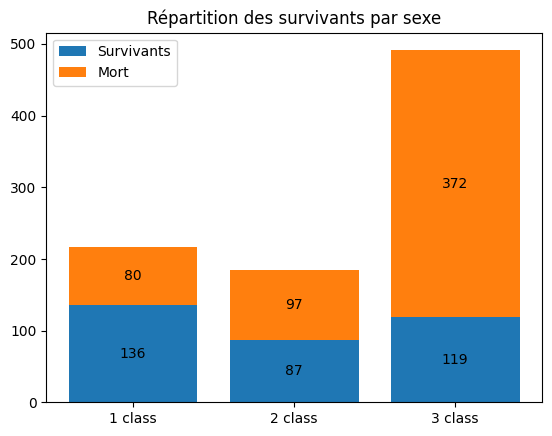

In [185]:
train = pd.read_csv('../titanic-project/titanic_data/train.csv')

# Compter le nombre total d'hommes et de femmes par class et le nombre de survivants par class
first_class_total = len(train.loc[(train['Pclass'] == 1)])
second_class_total = len(train.loc[(train['Pclass'] == 2)])
third_class_total = len(train.loc[(train['Pclass'] == 3)])
first_class_total_survived = len(train.loc[(train['Pclass'] == 1) & (train['Survived'] == 1)])
second_class_total_survived = len(train.loc[(train['Pclass'] == 2) & (train['Survived'] == 1)])
third_class_total_survived = len(train.loc[(train['Pclass'] == 3) & (train['Survived'] == 1)])

count = {
    "Survivants": [first_class_total_survived, second_class_total_survived, third_class_total_survived],
    "Mort": [first_class_total-first_class_total_survived, second_class_total-second_class_total_survived, third_class_total-third_class_total_survived]
}
# print(count)

#Visualiser
fig, ax = plt.subplots()
x = np.zeros(3) # list = [0,0 1 class ; 0,0 2 class; 0, 0; 3 class]
ax.set_title("Répartition des survivants par sexe")
for key, count in count.items():
    i = ax.bar(('1 class', '2 class', '3 class'),count, width=0.8, bottom=x, label=key)
    x+=count
    ax.legend()
    ax.bar_label(i, label_type="center")

plt.show()


Examinez la répartition des passagers par âge et la répartition des survivants, hommes et femmes, par âge.

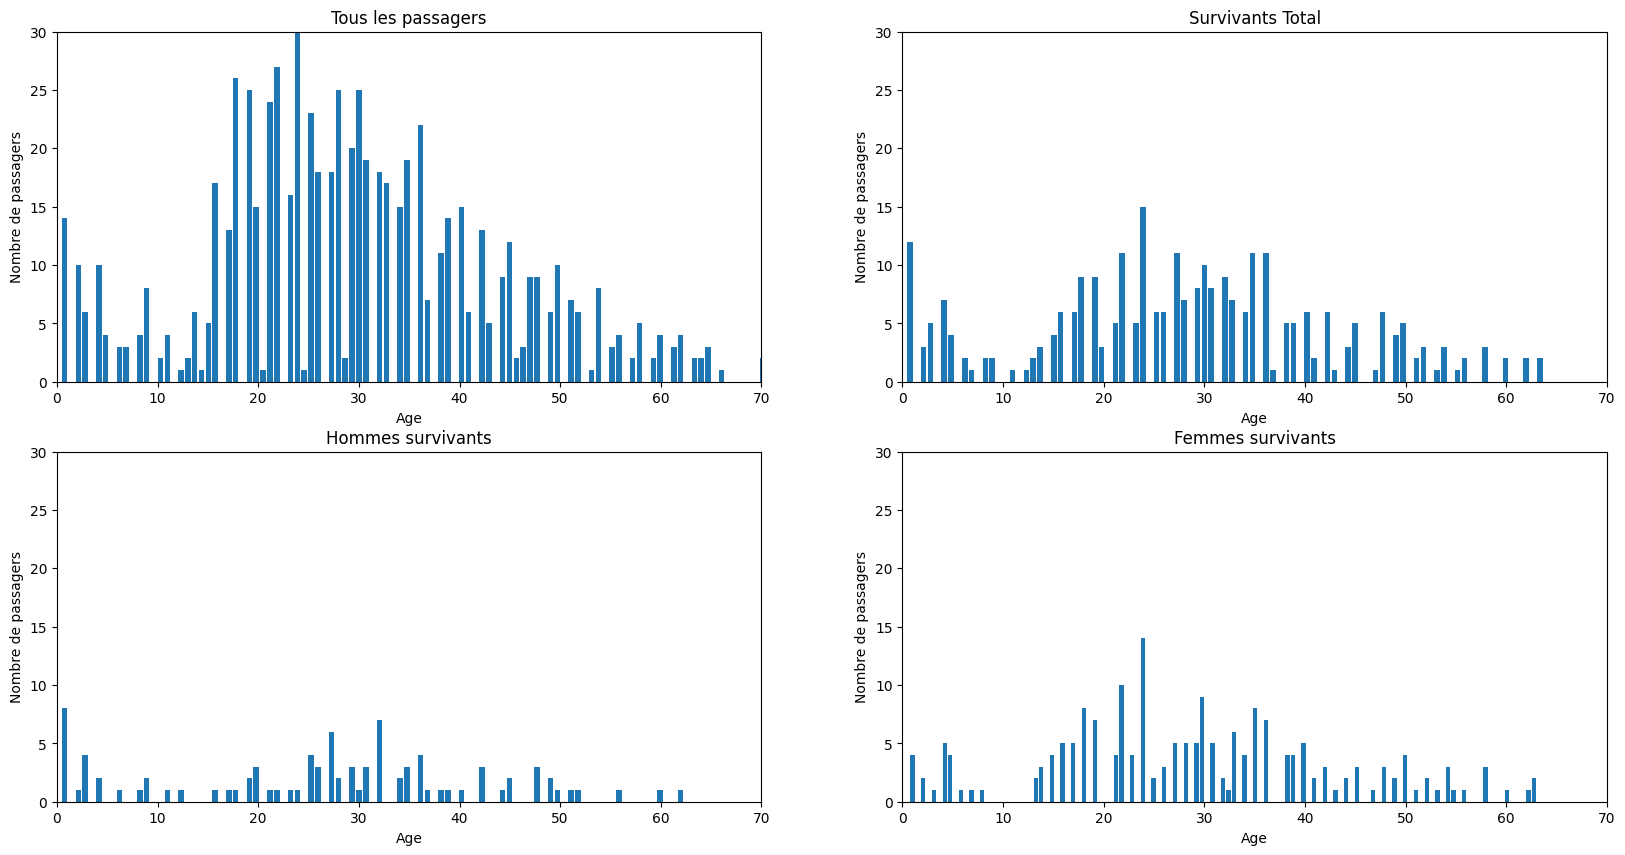

In [ ]:
from collections import Counter

#Sélectionnons les listes de passagers en groupes distincts
survivors = train.loc[(train['Survived'] == 1)]
male_survivors = train.loc[((train['Sex'] == 'male') & (train['Survived'] == 1))]
female_survivors = train.loc[((train['Sex'] == 'female') & (train['Survived'] == 1))]

#Nombre d'âges
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

#Visualiser
fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
psgrs = [['Tous les passagers', 'Survivants Total'], ['Hommes survivants', 'Femmes survivants']]
for i, surv in enumerate([[train, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages, rwidth=0.8)
        axs[i][j].set_title(psgrs[i][j])
        axs[i][j].set_xlabel('Age')
        axs[i][j].set_ylabel('Nombre de passagers')
        axs[i][j].set_ylim(0,30)
        axs[i][j].set_xlim(0,70)
plt.show()

Les passagers âgés de moins de 18 ans

Les passagers âgés de moins de 18 ans: 53.98%


<Axes: >

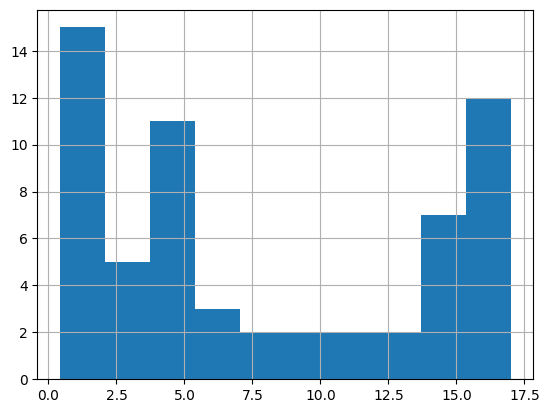

In [158]:
enfants = train.loc[((train['Age'] > 0) & (train['Age'] < 18))]
enfants_survivants = train.loc[((train['Age'] > 0) & (train['Age'] < 18) & (train['Survived'] == 1))]
print(f"Les passagers âgés de moins de 18 ans: {round(len(enfants_survivants)*100/len(enfants), 2)}%")
train.loc[((train['Age'] > 0) & (train['Age'] < 18) & (train['Survived'] == 1))].Age.hist()

Noms et âges

Représentons la dépendance de l'âge par rapport au titre sous la forme d'un ensemble de diagrammes en boîte.

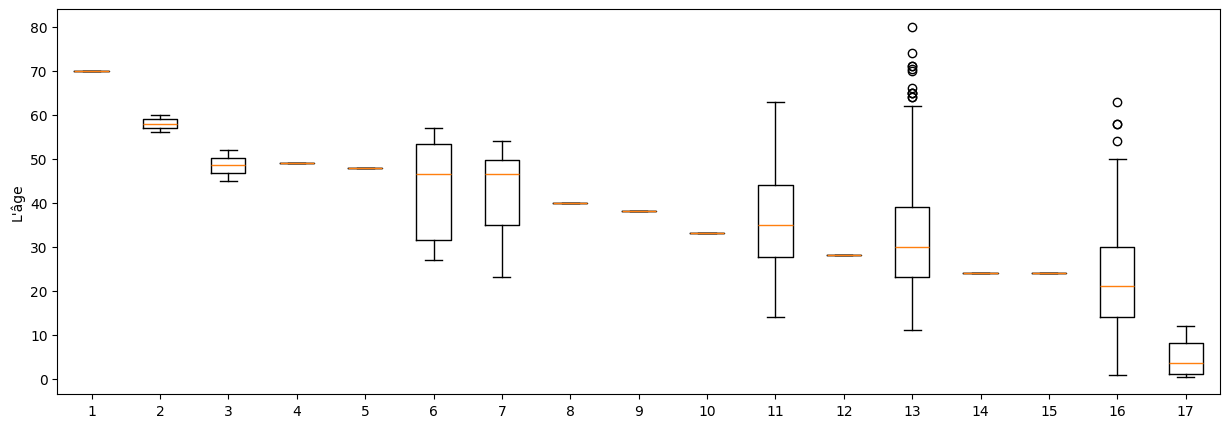

In [219]:
titles = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.")

#Créons une liste de titres pour chaque passagers
titled_names = []
for names in train.Name:
    for title in titles:
        if title in names.split(' '):
            titled_names.append(title)
            break
# print(titled_names)

#delete the column Title and recreate
#Ajouter une nouvelle colonne au dataframe - Titre
# train.insert(12, 'Title', titled_names)
# print(train['Title'])
# train = train.drop('Title', axis=1)

#Créer un dictionnaire avec des paires de titre : liste des âges
ages = dict.fromkeys(titles, [])
for i, title in enumerate(train.Title):
    if not pd.isna(train.Age[i]):
        ages[title] = ages[title] + [train.Age[i]]

#Visualiser
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(ages.values(), label=titles, vert=True)
ax.set_ylabel("L'âge")
plt.show()